# Note
### probably need to modify hdf5_format.py in /opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/saving/, remove all .decode('utf-8') part

In [1]:
img_path = '../YOLOv5-Classifier/linmao_classification/JPEGImages/8/nl_0098_0386.jpg'

In [2]:
import numpy as np
from PIL import Image

img = Image.open(img_path)
lr_img = np.array(img)

In [3]:
pwd

'/home/jupyter/image-super-resolution'

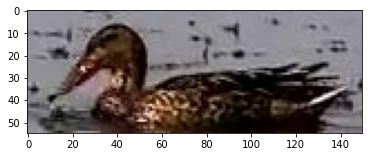

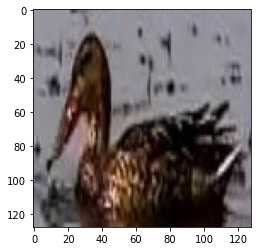

In [4]:
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()


img_size = 128

resized_arr = cv2.resize(img, (img_size, img_size)) # Reshaping images to preferred size
imgplot = plt.imshow(resized_arr)
plt.show()

In [5]:
img.shape

(55, 150, 3)

In [6]:
from ISR.models import RDN, RRDN, Cut_VGG19

name = ['psnr-small', 'psnr-large', 'noise-cancel', 'RRDN-gans']
rdn_small = RDN(weights='psnr-small') #psnr-large #psnr-small #noise-cancel
rdn_large = RDN(weights='psnr-large') #psnr-large #psnr-small #noise-cancel
rdn_noise = RDN(weights='noise-cancel') #psnr-large #psnr-small #noise-cancel
rrdn = RRDN(weights='gans', beta=0.2) # beta=0.2 is just good

models = [rdn_small, rdn_large, rdn_noise, rrdn]
results = []
for m in models:
    sr_img = m.predict(lr_img)
    results.append(sr_img)
    

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

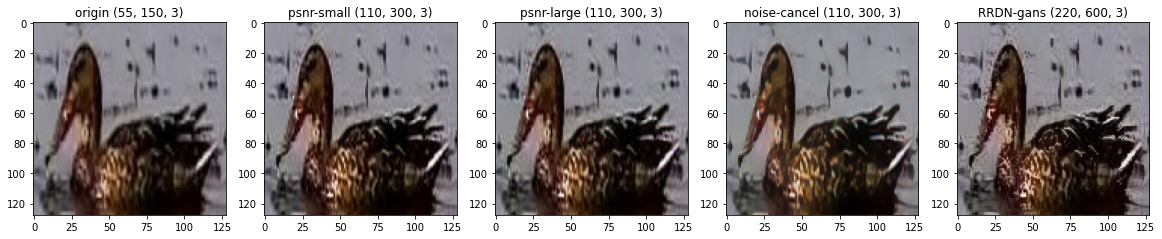

In [7]:
img_size = 128

plt.figure(figsize=(20, 5))
plt.subplot(1,5,1)
resized_arr = cv2.resize(img, (img_size, img_size)) # Reshaping images to preferred size
imgplot = plt.imshow(resized_arr)
plt.title(f'origin {img.shape}')

for idx, m_type in enumerate(name):
    plt.subplot(1,5,idx+2)
    sr_img = results[idx]
    resized_arr = cv2.resize(sr_img, (img_size, img_size)) # Reshaping images to preferred size
    imgplot = plt.imshow(resized_arr)
    plt.title(f'{m_type} {sr_img.shape}')
plt.show()

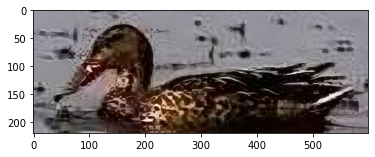

In [8]:
plt.imshow(results[-1])

# Super resolution for all

In [11]:
from ISR.models import RDN, RRDN, Cut_VGG19
rdn_small = RDN(weights='psnr-small') #psnr-large #psnr-small #noise-cancel
rdn_large = RDN(weights='psnr-large') #psnr-large #psnr-small #noise-cancel
rdn_noise = RDN(weights='noise-cancel') #psnr-large #psnr-small #noise-cancel
rrdn = RRDN(weights='gans', beta=0.15)

In [12]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import cv2

In [24]:
cls_img_dir = '../YOLOv5-Classifier/linmao_classification/JPEGImages'
out_put_dir = 'linmao_classification_rrdn'

In [64]:
finished_names = set()
for root, dirs, files in os.walk(out_put_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".JPG"):
            if 'checkpoint' in file:
                pass
            else:
                the_path = os.path.join(root, file)
                img_name = os.path.join(*the_path.split(os.sep)[-2:])
                finished_names.add(img_name)

In [65]:
len(finished_names)

735

In [66]:
removed_imgs = []
for root, dirs, files in os.walk(cls_img_dir):
    for file in files:
        the_path = os.path.join(root, file)
        if 'checkpoint' in file:
            removed_imgs.append(the_path)
            os.remove(the_path)
        else:
            pass

In [51]:
len(removed_imgs)

0

In [67]:
image_path = []
for root, dirs, files in os.walk(cls_img_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".JPG"):
            if 'checkpoint' in file:
                pass
            else:
                the_path = os.path.join(root, file)
                img_name = os.path.join(*the_path.split(os.sep)[-2:])
                if img_name in finished_names:
                    pass
                else:
                    image_path.append(the_path)


In [29]:
for img_p in tqdm(image_path):
    sub_path = img_p.replace(cls_img_dir+'/', '')
    if len(sub_path.split('/')) > 1:
        sub_dir = sub_path.split('/')[0]
        save_dir = os.path.join(out_put_dir, sub_dir)
        os.makedirs(save_dir, exist_ok=True)
    else:
        save_dir = out_dir
    img_name = os.path.splitext(img_p.split(os.sep)[-1])[0]
    img = Image.open(img_p)
    lr_img = np.array(img)
    sr_img = rrdn.predict(lr_img)
    save_path = os.path.join(save_dir, img_name+'.jpg')
    cv2.imwrite(save_path, cv2.cvtColor(sr_img, cv2.COLOR_RGB2BGR))

  0%|          | 0/49955 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


  0%|          | 1/49955 [00:01<21:05:21,  1.52s/it]

  1%|▏         | 735/49955 [51:08<57:04:49,  4.17s/it] 


KeyboardInterrupt: 

In [ ]:
from ISR.models import RRDN
from ISR.models import Discriminator
from ISR.models import Cut_VGG19

lr_train_patch_size = 40
layers_to_extract = [5, 9]
scale = 2
hr_train_patch_size = lr_train_patch_size * scale

rrdn  = RRDN(arch_params={'C':4, 'D':3, 'G':64, 'G0':64, 'T':10, 'x':scale}, patch_size=lr_train_patch_size)
f_ext = Cut_VGG19(patch_size=hr_train_patch_size, layers_to_extract=layers_to_extract)
discr = Discriminator(patch_size=hr_train_patch_size, kernel_size=3)

In [ ]:
from ISR.train import Trainer
loss_weights = {
  'generator': 0.0,
  'feature_extractor': 0.0833,
  'discriminator': 0.01
}
losses = {
  'generator': 'mae',
  'feature_extractor': 'mse',
  'discriminator': 'binary_crossentropy'
}

log_dirs = {'logs': './logs', 'weights': './weights'}

learning_rate = {'initial_value': 0.0004, 'decay_factor': 0.5, 'decay_frequency': 30}

flatness = {'min': 0.0, 'max': 0.15, 'increase': 0.01, 'increase_frequency': 5}

trainer = Trainer(
    generator=rrdn,
    discriminator=discr,
    feature_extractor=f_ext,
    lr_train_dir='low_res/training/images',
    hr_train_dir='high_res/training/images',
    lr_valid_dir='low_res/validation/images',
    hr_valid_dir='high_res/validation/images',
    loss_weights=loss_weights,
    learning_rate=learning_rate,
    flatness=flatness,
    dataname='image_dataset',
    log_dirs=log_dirs,
    weights_generator=None,
    weights_discriminator=None,
    n_validation=40,
)

In [ ]:
trainer.train(
    epochs=80,
    steps_per_epoch=500,
    batch_size=16,
    monitored_metrics={'val_PSNR_Y': 'max'}
)